In [1]:
%matplotlib notebook
from symfit import parameters, Variable, Fit, exp
import matplotlib.pyplot as plt
import numpy as np
import peakutils
from scipy.signal import savgol_filter
import scipy.signal as signal
import statistics

In [2]:
curve = np.genfromtxt('CD_B_urea curve3.txt').T
curve.shape

(2, 13)

<IPython.core.display.Javascript object>


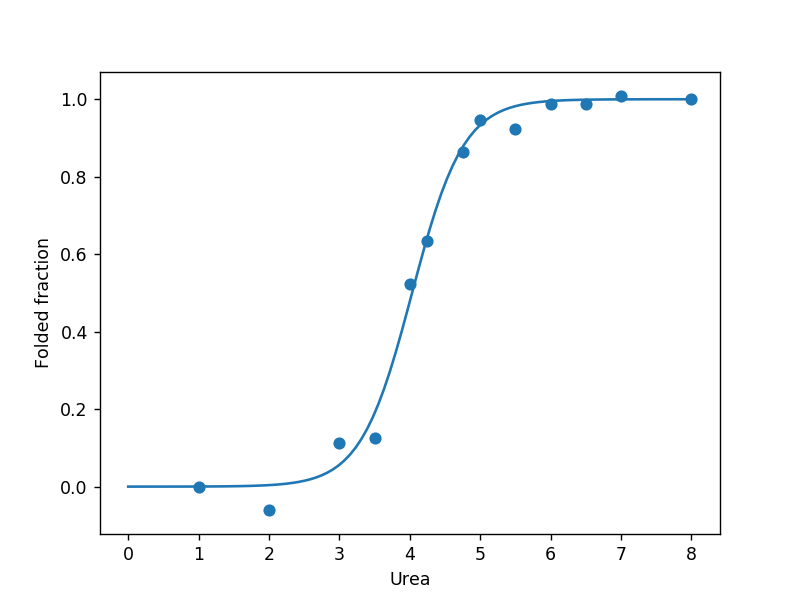

In [3]:
#plot raw data
x=curve[0]
F=curve[1]
plt.xlabel('Urea')
plt.ylabel('Folded fraction')
plt.scatter(x,F)

In [35]:
type(x)

symfit.core.argument.Variable

In [2]:
#model formula for fitting with 2 parameters and one variable
# equation from pyfolding: https://github.com/quantumjot/PyFolding
# https://github.com/quantumjot/PyFolding/blob/3e343644f70d6cfe5e552e7c8ec5da76acb1d8c5/pyfolding/models.py#L78
m, d50 = parameters('m d50')
x = Variable('x')
RT=8.345*(273.15+25)
model = exp((m*(x-d50))/RT) / (1+exp((m*(x-d50))/RT))

model

exp(0.000401919285162436*m*(-d50 + x))/(exp(0.000401919285162436*m*(-d50 + x)) + 1)

In [ ]:
# data 
xdata = curve[0]
Fdata = curve[1]

#fitting
fit = Fit(model, xdata, Fdata)
fit_result = fit.execute()

In [5]:
#Printing the parameters from the fit with d50 the urea concentration for F=0.5 and m-value describing the slope
print (fit_result)

Scalar Parameters:
Parameter | Value       | Standard Deviation
d50         4.032390e+00  3.680115e-02
m           6.794758e+03  6.961722e+02
Status message         Optimization terminated successfully.
Number of iterations   23
Objective              <symfit.core.objectives.LeastSquares object at 0x0000021DDDB9CEF0>
Minimizer              <symfit.core.minimizers.BFGS object at 0x0000021DDDBA7E48>

Goodness of fit qualifiers:
chi_squared            0.017502024082582255
objective_value        0.008751012041291127
r_squared              0.9919851342641725


In [6]:
# Plotting the fit on a figure with good resolution (with x 100 steps between 0-8M Urea) and for Y the fit parameters
xmodel = np.linspace(0,8,num=100,endpoint=True)
ymodel = model(xmodel,**fit_result.params)
plt.plot(xmodel,ymodel)

In [8]:
np.savetxt('CD_PpiB urea curve_fit2', ymodel)